In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
## Very important hack to see the plots correctly---------!!!!
from jupyterthemes import jtplot
jtplot.style(theme="monokai", context="notebook", ticks=True, grid=False)

In [2]:
file1 = 'pima-indians-diabetes.data.csv' #No header been included
file2 = 'olympics.csv'

In [4]:
from pandas import read_csv
names= ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
df1 = read_csv(file1,names=names)

(768, 9)

In [5]:
df1.head()

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


From this data we have to find out whether or not patients have 
possibilities to have diabetes within next 5 years??

Below lists the eight attributes for the dataset:
    1. Number of times pregnant ---- (preg)
    2. Plasma glucose concentration 2 hours in an oral glucose tolerance test--- (plas)
    3. Diastolic blood pressure (mm Hg)----------- (pres)
    4. Triceps skin fold thickness (mm)-----(skin)
    5. 2-Hour serum insulin (mu U/ml)-------(test)
    6. Body mass index (BMI)-------(mass)
    7. Diabetes pedigree function-----(pedi)
    8. Age (years)-------(age)
    9. Class, onset of diabetes within five years--->> class/label/output/target

In [9]:
df1.shape

(768, 9)

    -- so here total instances/objects/rows = 768
    -- Total variables 9(8+label)
    -- All variables are numeric and if not we have to convert them into numbers

In [10]:
df1.dtypes# Just checking all variable's data types, as if string then we have to convert!!

preg       int64
plas       int64
pres       int64
skin       int64
test       int64
mass     float64
pedi     float64
age        int64
class      int64
dtype: object

In [14]:
# A quick descriptive statistics
pd.set_option('precision',2) ## for precisions REMEMBER!!!
df1.describe()

,preg,plas,pres,skin,test,mass,pedi,age,class
count,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00
mean,3.85,120.89,69.11,20.54,79.80,31.99,0.47,33.24,0.35
std,3.37,31.97,19.36,15.95,115.24,7.88,0.33,11.76,0.48
min,0.00,0.00,0.00,0.00,0.00,0.00,0.08,21.00,0.00
25%,1.00,99.00,62.00,0.00,0.00,27.30,0.24,24.00,0.00
50%,3.00,117.00,72.00,23.00,30.50,32.00,0.37,29.00,0.00
75%,6.00,140.25,80.00,32.00,127.25,36.60,0.63,41.00,1.00
max,17.00,199.00,122.00,99.00,846.00,67.10,2.42,81.00,1.00


In [15]:
# Now we will check label class distribution
df1['class'].value_counts()

0    500
1    268
Name: class, dtype: int64

In [16]:
# Or by groupby() method which takes the column then apply function 
df1.groupby('class').size()

class
0    500
1    268
dtype: int64

    --Here we need work on labels as we have mostly no diabetic records

In [17]:
# Now we will check correlation between variables
pd.set_option('precision',3)
pd.set_option('display.width',100)
df1.corr(method='pearson')

,preg,plas,pres,skin,test,mass,pedi,age,class
preg,1.000,0.129,0.141,-0.082,-0.074,0.018,-0.034,0.544,0.222
plas,0.129,1.000,0.153,0.057,0.331,0.221,0.137,0.264,0.467
pres,0.141,0.153,1.000,0.207,0.089,0.282,0.041,0.240,0.065
skin,-0.082,0.057,0.207,1.000,0.437,0.393,0.184,-0.114,0.075
test,-0.074,0.331,0.089,0.437,1.000,0.198,0.185,-0.042,0.131
mass,0.018,0.221,0.282,0.393,0.198,1.000,0.141,0.036,0.293
pedi,-0.034,0.137,0.041,0.184,0.185,0.141,1.000,0.034,0.174
age,0.544,0.264,0.240,-0.114,-0.042,0.036,0.034,1.000,0.238
class,0.222,0.467,0.065,0.075,0.131,0.293,0.174,0.238,1.000


In [18]:
# Now we will check the skew of the univariate distribution
df1.skew()

preg     0.902
plas     0.174
pres    -1.844
skin     0.109
test     2.272
mass    -0.429
pedi     1.920
age      1.130
class    0.635
dtype: float64

    Histograms. A fast way to get an idea of the distribution of each attribute is to look at histograms.
    Histograms group data into bins and provide you a count of the number of observations in each bin.
    From the shape of the bins you can quickly get a feeling for whether an attribute is Gaussian,
    skewed or even has an exponential distribution. It can also help you see possible outliers.

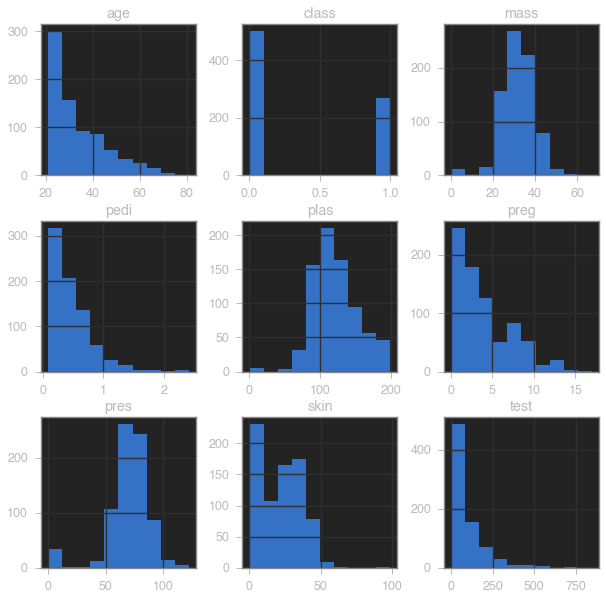

In [31]:
pd.set_option('display.width',350)
df1.hist(figsize=(10,10))
plt.show()

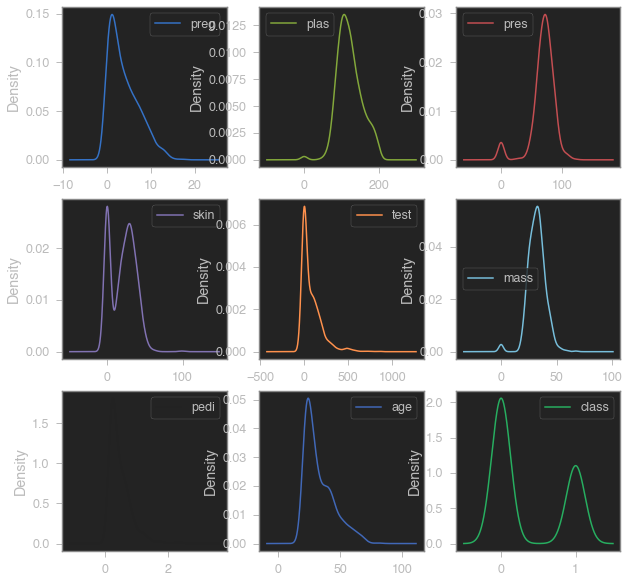

In [36]:
# Density plot
df1.plot(kind='density', subplots=True, layout=(3,3), sharex=False, figsize=(10,10))
plt.show()

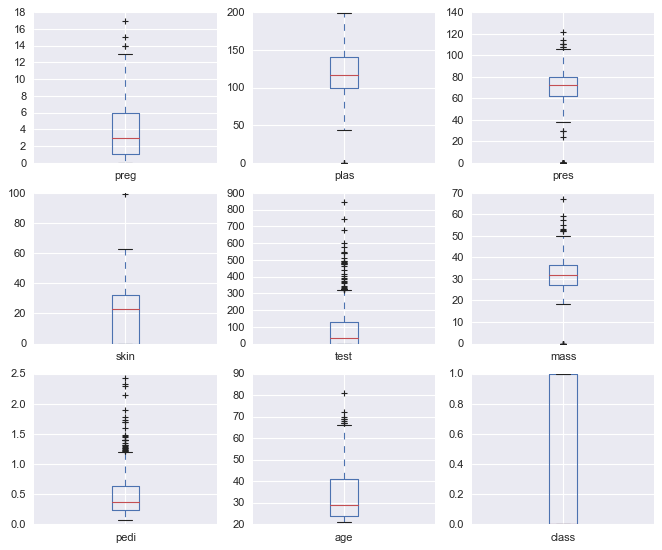

In [56]:
## Box plots
df1.plot(kind='box',figsize=(10,8),subplots=True,layout=(3,3),sharex=False,sharey=False)
plt.show()
plt.style.use('seaborn-bright')


In [52]:
plt.style.available

['seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-ticks',
 'fivethirtyeight',
 'seaborn-whitegrid',
 'classic',
 '_classic_test',
 'fast',
 'seaborn-talk',
 'seaborn-dark-palette',
 'seaborn-bright',
 'seaborn-pastel',
 'grayscale',
 'seaborn-notebook',
 'ggplot',
 'seaborn-colorblind',
 'seaborn-muted',
 'seaborn',
 'Solarize_Light2',
 'seaborn-paper',
 'bmh',
 'tableau-colorblind10',
 'seaborn-white',
 'dark_background',
 'seaborn-poster',
 'seaborn-deep']

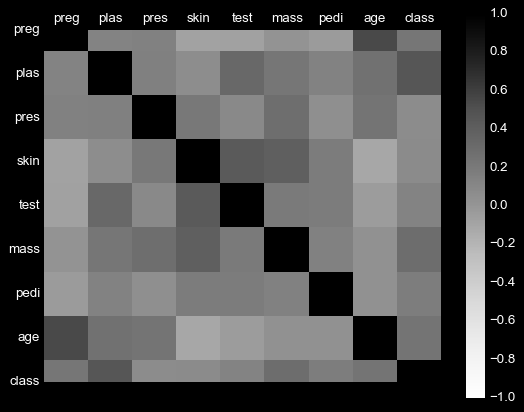

In [73]:
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
correlations = df1.corr()
# plot correlation matrix
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,9,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.show()
#plt.style.use('dark_background')

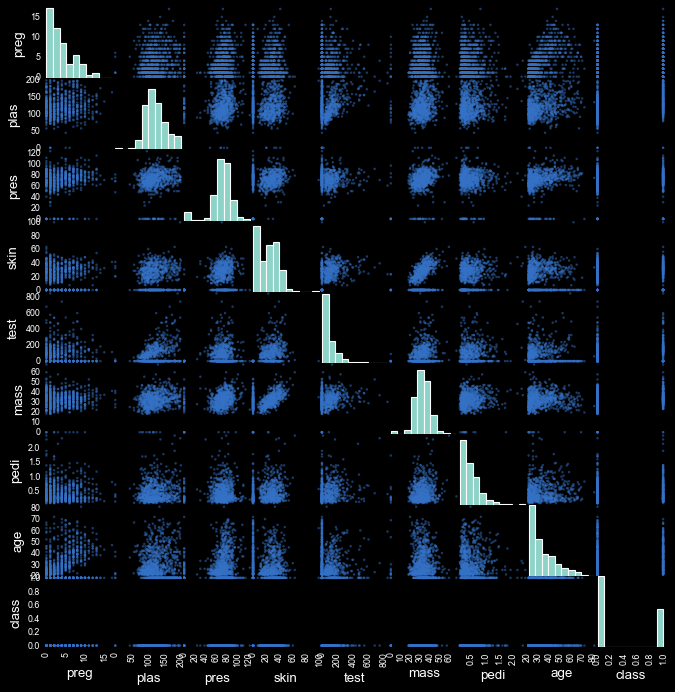

In [77]:
from pandas.plotting import scatter_matrix
scatter_matrix(df1, figsize=[10, 10])
plt.show()